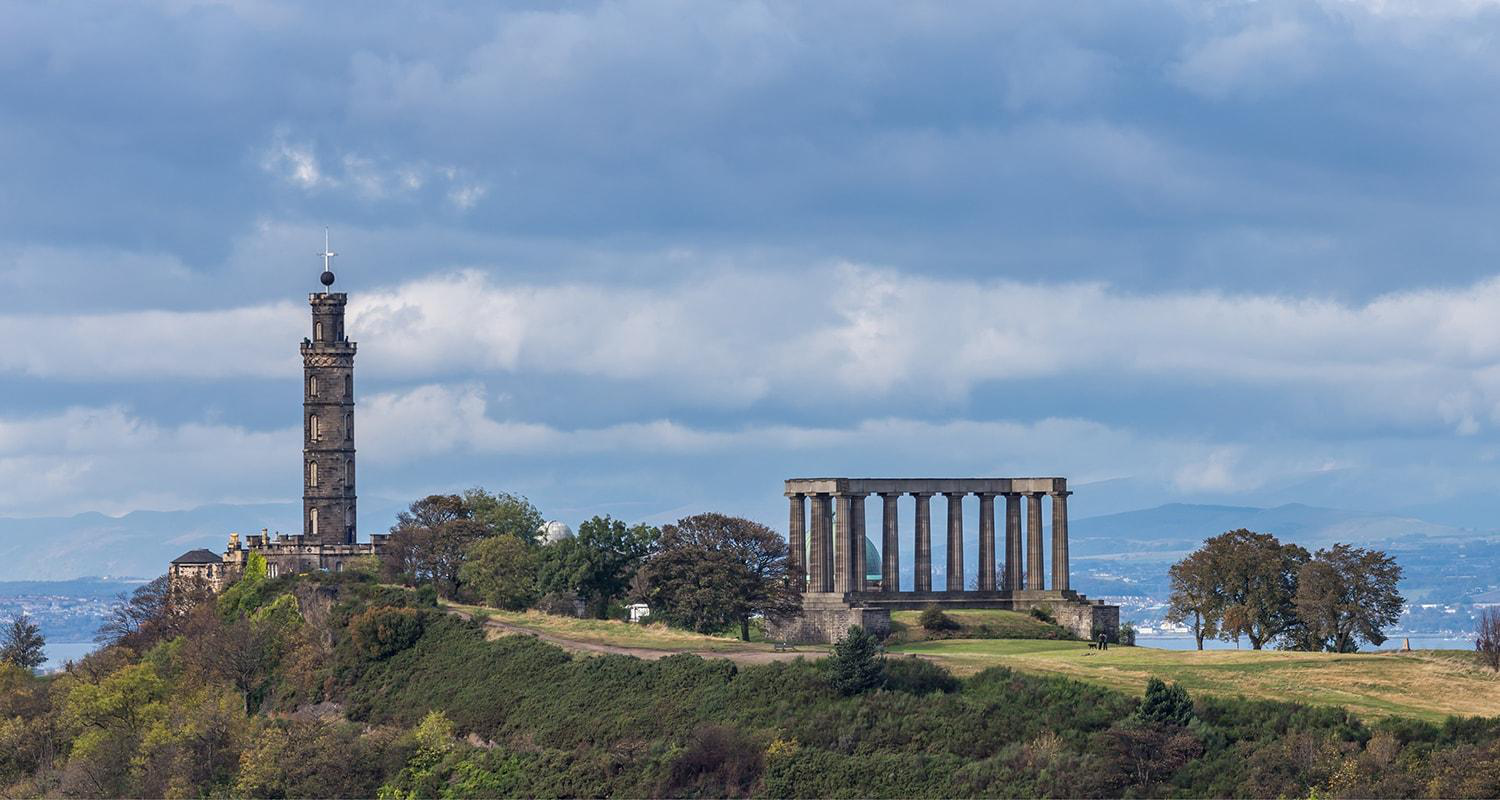

In [172]:
import cv2
from PIL import Image
import numpy as np

img = cv2.imread('monument.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
Image.fromarray(img)

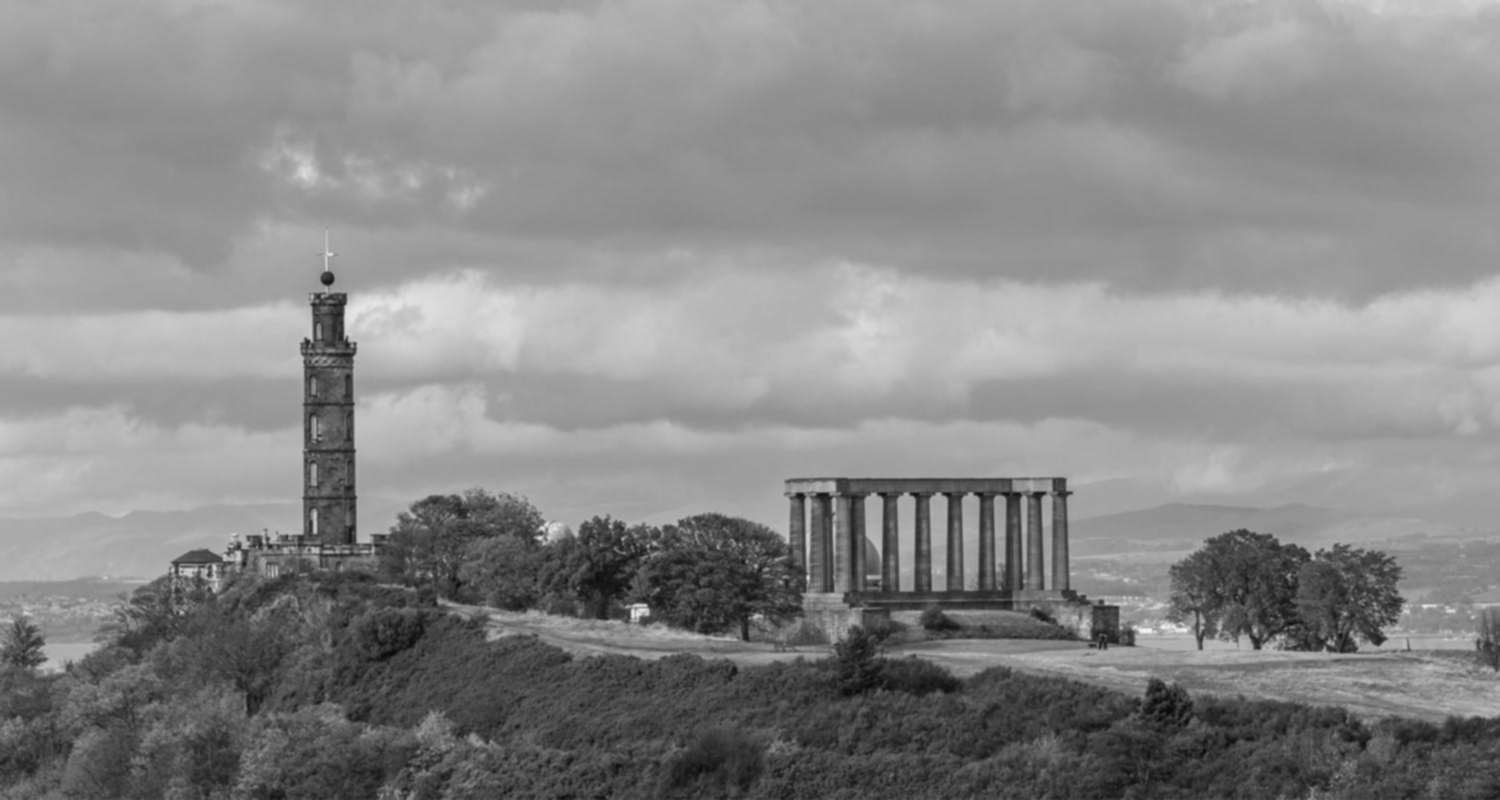

In [9]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
Image.fromarray(gray)
blur = cv2.GaussianBlur(gray, (11, 11), 1)
Image.fromarray(blur)

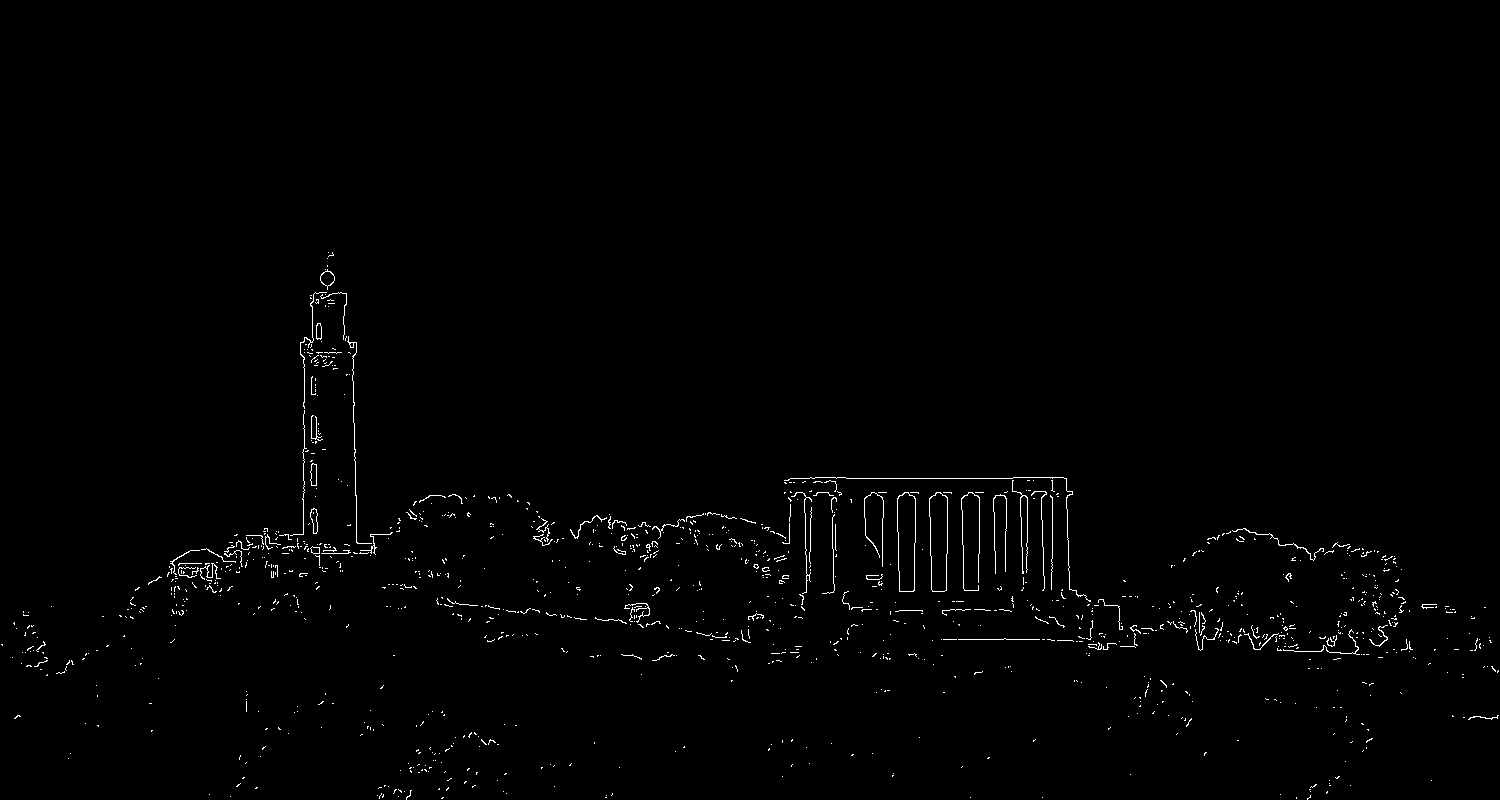

In [70]:
canny = cv2.Canny(blur, 200, 200)
Image.fromarray(canny)

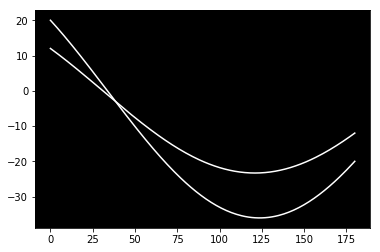

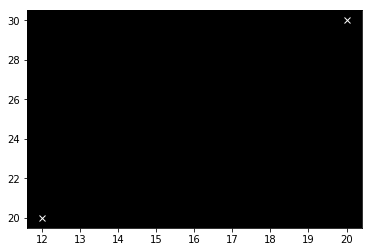

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline

p0 = [20, 30]
p1 = [12, 20]

f, ax1 = plt.subplots()
f, ax2 = plt.subplots()
d0 = np.zeros(181)
for k in range(0, 181):
    d0[k] = p0[0]*np.cos(np.radians(k)) - p0[1]*np.sin(np.radians(k))

d1 = np.zeros(181)
for k in range(0, 181):
    d1[k] = p1[0]*np.cos(np.radians(k)) - p1[1]*np.sin(np.radians(k))

ax2.plot(p0[0], p0[1], 'x', color='w')
ax2.plot(p1[0], p1[1], 'x', color='w')
#ax2.set_facecolor('k')
    
ax1.plot(list(range(0, 181)), d0, 'white')
ax1.plot(list(range(0, 181)), d1, 'white')
#ax1.set_facecolor('k')


plt.show()

In [71]:
from collections import Counter

Counter(canny.flatten())

Counter({0: 1189654, 255: 10346})

In [79]:
from collections import defaultdict

accumulator = defaultdict(int)

for i in range(canny.shape[0]):
    for j in range(canny.shape[1]):
        
        if canny[i][j] == 255:
            
            for k in range(0, 181):
                d = i*np.cos(np.radians(k)) - j*np.sin(np.radians(k))
                accumulator['{},{}'.format(floor(d), k)] += 1

In [99]:
threshold = 120

In [100]:
accumulator_fil = list(filter(lambda x:accumulator[x] > threshold, accumulator))

In [107]:
accumulator_fil

['-347,89', '478,0', '-479,180', '639,0', '-640,180']

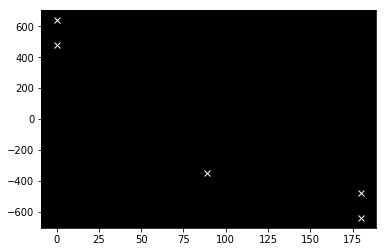

In [101]:
from math import floor
plt.plot([float(x.split(',')[1]) for x in accumulator_fil], [floor(float(x.split(',')[0])) for x in accumulator_fil], 'x', color='white')
plt.show()

In [165]:
r, t = -347, np.radians(89)

for i in range(img.shape[1]):
    y = floor(i*np.cos(t)/np.sin(t) - r/np.sin(t))
    if y < img.shape[0] and y > 0:
        img[i:i+1, y:y+1] = [0, 255, 0]

In [166]:
r, t = 478, np.radians(0)
img[r:r+1, :] = [0, 255, 0]

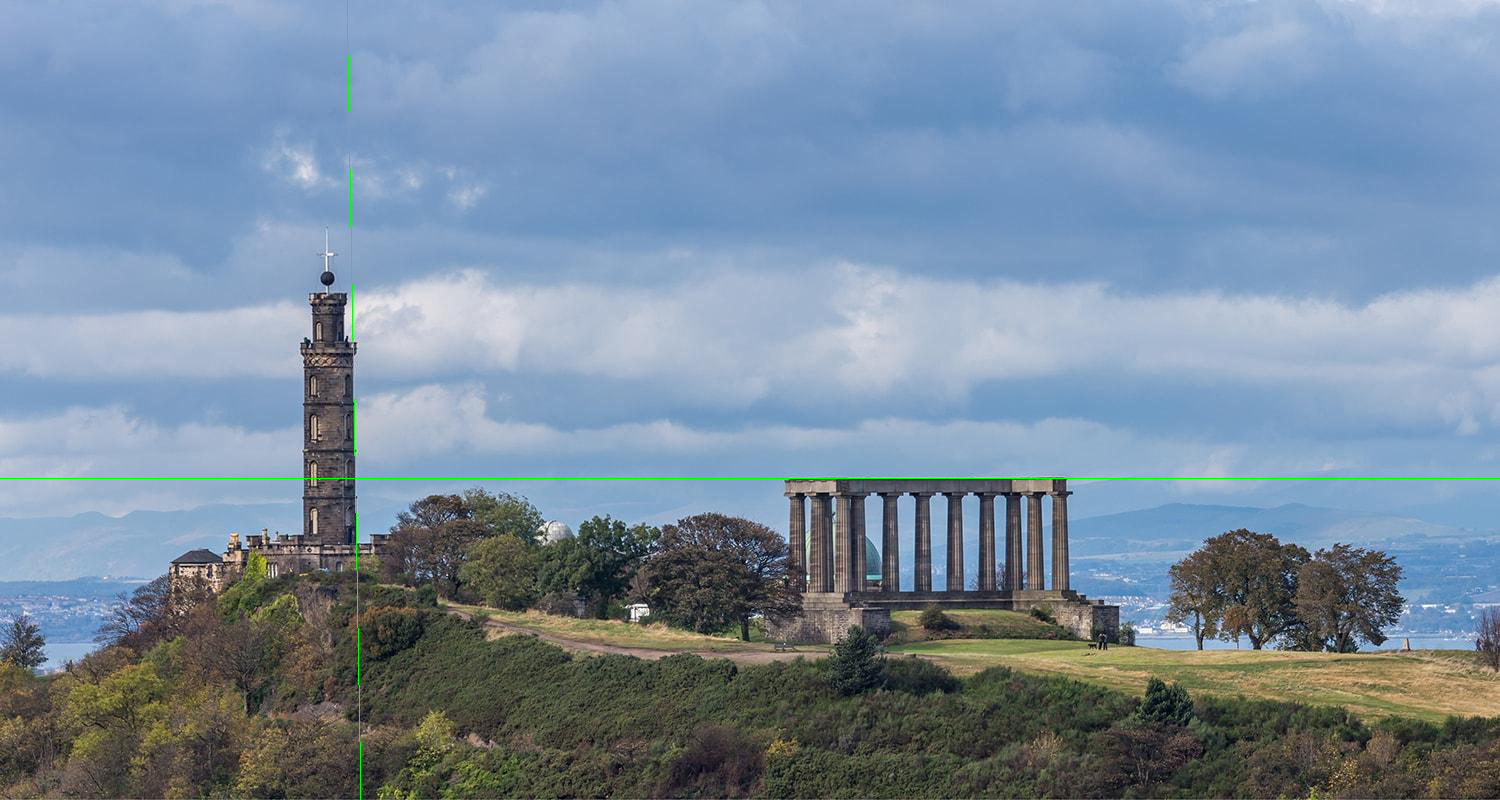

In [167]:
Image.fromarray(img)

In [168]:
r, t = 639, np.radians(0)
img[r:r+1, :] = [0, 255, 0]

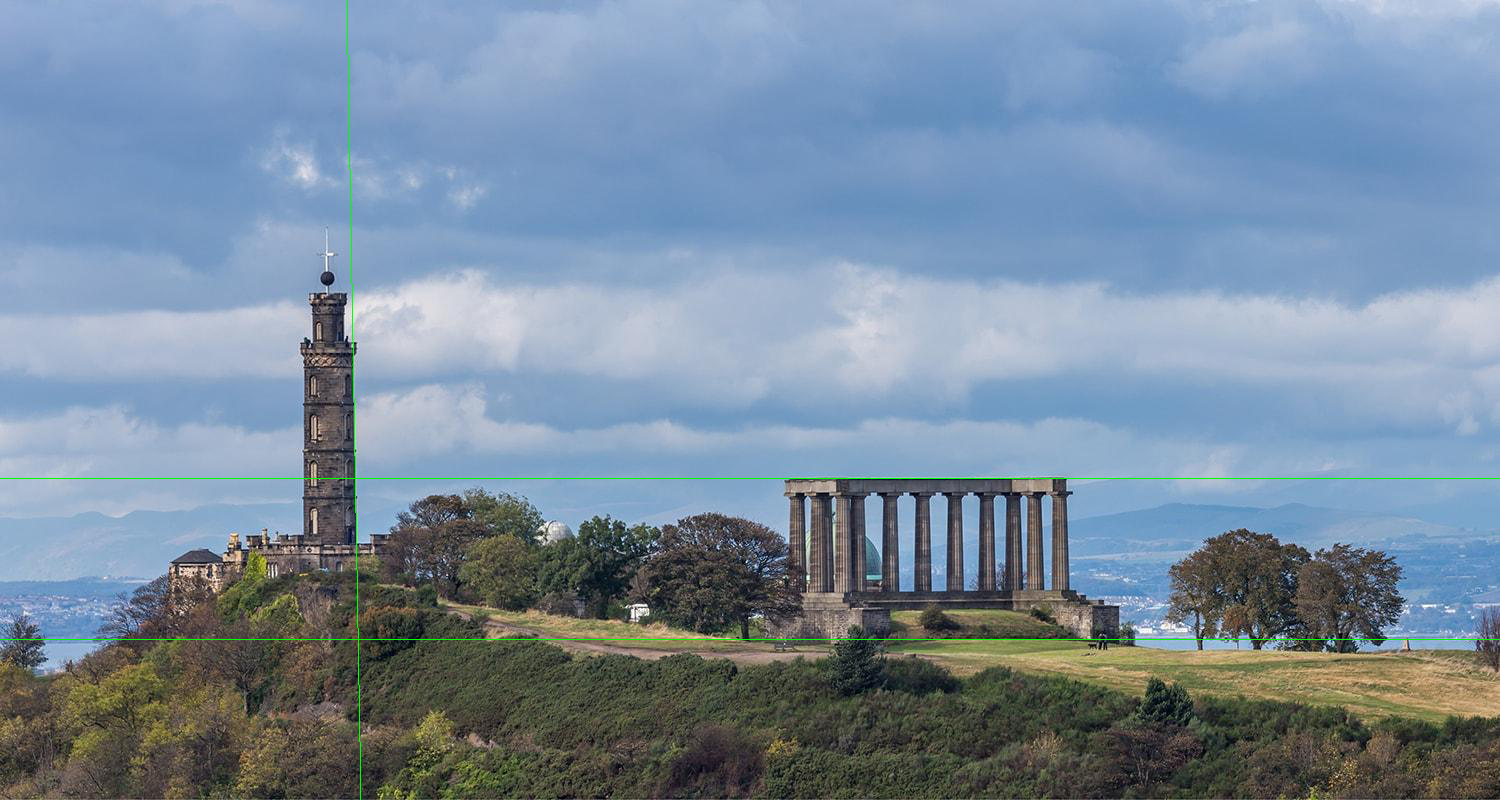

In [169]:
Image.fromarray(img)